In [1]:
import numpy as np
import matplotlib


def parseData(fname):
  list = []
  for l in open(fname):
    list.append(l)
  return list

print "Reading data..."
data = parseData("data0.txt")
print "done"

X = []
Y = []

for i in data:
    split = i.split()
    X.append((int(split[0]),int(split[1])))
    Y.append(int(split[2]))
    


Reading data...
done


In [60]:
from numpy import random
def MultiClassPerceptron(data, labels):
    

    # Here x is the data, y are the labels
    w = np.zeros([np.amax(labels)+1, len(data[0])])
    b = np.zeros(np.amax(labels)+1);
    
    # Permutes the data
    zipped = zip(data, labels)
    np.random.shuffle(zipped)
    newData = np.zeros([len(data), len(data[0])])
    newLabels = np.zeros(len(labels))
    
    for j, elem in enumerate(zipped):
        newData[j] = elem[0]
        newLabels[j] = elem[1]

    # Data is permuted 
    
    # Time to learn
    
    correct = 0
    
   # while(np.sum(correct) != len(newData)):
    while(correct < len(labels)):
        correct = 0
        for i in range(len(labels)):
        
        
        
            #Data Point
            x = newData[i]
            
            # Correct Label
            y =  int(newLabels[i]) 
           
        
            # Predicted label
            predictedY = 0
            maxNum = 0
                
            for j in range(0, 4):
                if(maxNum < np.dot(x, w[j])+b[j]):
                    maxNum = np.dot(x, w[j])+b[j]
                    predictedY = j
            
            if(predictedY != y):
                
                # Correct Label
                w[y] = w[y] + x
                b[y] = b[y] + 1;
                
                #Incorrect Label
                w[predictedY] = w[predictedY] - x
                b[predictedY] = b[predictedY] - 1
            else:
                correct += 1
                        
    return w, b
                
                
    
    
    

In [57]:
w, b = MultiClassPerceptron(X, Y)

print w
print b

[[  9.  -6.]
 [-47.  32.]
 [ 26. -28.]
 [ 12.   2.]]
[ 52. -15. -14. -23.]


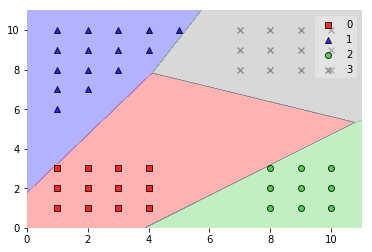

In [59]:
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import Perceptron
import matplotlib
from matplotlib import pyplot as plt
import mlxtend
from mlxtend.plotting import plot_decision_regions



xx = np.array(X)
yy = np.array(Y)


pct = Perceptron()

pct.coef_ = w
pct.intercept_ = b

pct.classes_ = np.unique([0, 1, 2, 3])


plot_decision_regions(xx, yy, clf=pct, res=.001)



plt.show()